# AUTOMATIC MULTISTAGE RANDOM SAMPLING GENERATOR

Program ini merupakan prorgam yang dapat menjalankan proses sampling dengan kriteria-kriteria tertentu secara otomatis, yang berguna dalam meningkatkan efisiensi survei nasional.

*  Dalam survei nasional yang dilakukan oleh Populi Center, sampling dilakukan dengan metode multistage random sampling. Kerangka sampel diambil  berdasarkan jumlah populasi di setiap wilayah provinsi yang kemudian diproporsikan berdasarkan jumlah desa/kota ada.
*  Proses penentuan kerangka sampling ini diperlihatkan dari gambar di bawah:
*  Program ini cukup meminta input lokasi file database (dataframe), kategori wilayah, dan jumlah sampel yang diinginkan. Hasil program akan mengembalikan kerangka sampling yang dituju dalam bentuk dataframe.
*  Selain itu, dalam proses sampling, jika terdapat duplikasi berdasarkan nama kabupaten/kota, maka nilai duplikat harus digantikan. Penggantian dilakukan dengan melakukan randomisasi ulang terhadap data yang belum disampel sebanyak jumlah nilai duplikat.






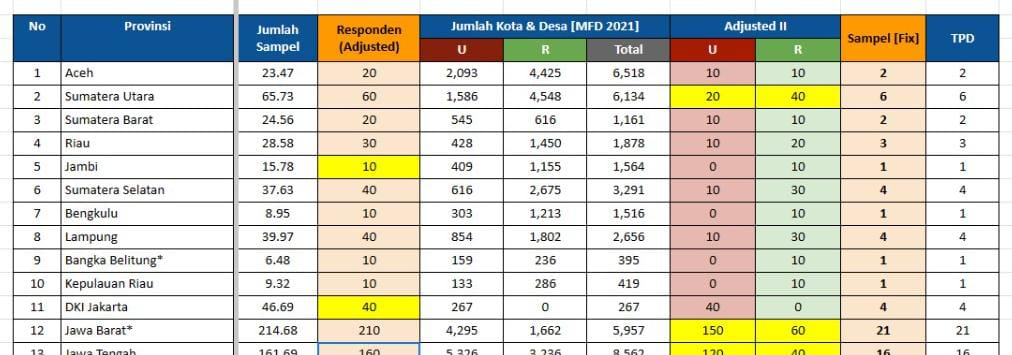

Kode pembuatan program ini ditampilkan oleh script code berikut:

*   Sebagai contoh, random sampling dilakukan terhadap file dari Provinsi Jabar dengan nama file: '/content/drive/MyDrive/.DATASET/Database JAWA BARAT.xlsx'
*   Wilayah ini membutuhkan 15 daerah sampel di kategori urban dan 6 daerah sampel di kategori rural


In [257]:
#Import Library
import pandas as pd
import random
import numpy as np

In [261]:
#Membuat class MultiRandom yang memiliki beberapa method yang menjalankan proses loading data hingga randomisasi sampel
class MultiRandom:
  #Method menampung parameter utama yang digunakan di method lain
  def __init__ (self, copy_path, kategori, sample):
    self.copy_path = copy_path
    self.kategori = kategori
    self.sample = sample

  #Method untuk meload data
  def load_data (self):
    self.init_dataframe = pd.read_excel(copy_path)
    self.init_dataframe = pd.DataFrame(self.init_dataframe)

  #Method untuk memfilter data berdasarkan kategori wilayah
    #Mengembalikan False jika terdapat keesalahan input
  def kategori_urban_rural (self):
    self.df_filtered = self.init_dataframe.copy()

    if kategori == 1:
       self.df_filtered = self.df_filtered[self.df_filtered['UR'] == 1].reset_index().drop(['index'], axis =1)
    elif kategori == 2:
       self.df_filtered = self.df_filtered[self.df_filtered['UR'] == 2].reset_index().drop(['index'], axis =1)
    else:
       ValueError
       return False

  #Method untuk melakukan randomisasi
    #Mengembalikan hasil randomisasi dalam bentuk dataframe
  def randomisasi (self):
    self.count_area = len(self.df_filtered)
    intv_sampling = int(round(self.count_area/(sample+1), 0))
    list_sampling = list(np.arange(random.randint(0, self.count_area), self.count_area, intv_sampling))
    length_sample = len(list_sampling)

    while length_sample <= sample:
      add_sample = (list_sampling[len(list_sampling)-1] + intv_sampling - self.count_area)

      if add_sample <0:
        add_sample += self.count_area

      list_sampling.append(add_sample)

      length_sample += 1

    self.init_preview = self.df_filtered.iloc[list_sampling]
    self.preview_2 = self.init_preview.copy(deep=True)

    return self.preview_2

  #Membuat method yang menghilangkan nilai random berdasarkan kolom kabupaten
    #Dalam method ini terdapat fungsi yang mengembaikan dataframe dari wilayah non sampling
      #Sengan pengecekan panjang datframe smapling yang nonduplikat dengan jumlah sampel yang diinginkan,
      #Kaka, akan ada ranodmisai ulang terhadap datframe wilayah yang belum tersampling dengan jumlah sampel sisa,
      #Kemudian, dataframe sampling awal akan digabungkan dengan dataframe sampling sisa
  def not_duplicates (self):
    self.not_duplicates = pd.DataFrame(self.preview_2)
    self.not_duplicates = self.not_duplicates.drop_duplicates(subset=['NMKAB'], keep= 'first')

    def df_notunique (self):
      init_unique = self.not_duplicates['NMKAB'].unique().tolist()
      list_index = []

      for i in init_unique:
        index_init_unique = self.df_filtered.index[self.df_filtered['NMKAB'] == i].tolist()
        list_index.append(index_init_unique)

      list_flattened = []
      for sublist in list_index:
        for item in sublist:
          list_flattened.append(item)

      self.new_df_filtered = self.df_filtered.drop(list_flattened).reset_index()
      return self.new_df_filtered

    df_notunique(self)

    rest = (sample + 1) - len(self.not_duplicates['NMKAB'].unique())

    if rest == 0:
        return self.not_duplicates
    elif rest == 1:
        self.count_2 = len(self.new_df_filtered)
        intv_sampling_2 = int(round(self.count_2/rest, 0))
        list_sampling_2 = list(np.arange(random.randint(0, self.count_2), self.count_2, intv_sampling_2))

        self.init_preview_2 = self.new_df_filtered.iloc[list_sampling_2]
        self.preview_new = self.init_preview_2.copy(deep=True)
        return pd.concat([self.not_duplicates, self.preview_new], axis=0)

    else:
        # return self.new_df_filtered
        self.count_2 = len(self.new_df_filtered)
        intv_sampling_2 = int(round(self.count_2/rest, 0))
        list_sampling_2 = list(np.arange(random.randint(0, self.count_2), self.count_2, intv_sampling_2))
        length_sample_2 = len(list_sampling_2)

        while length_sample_2 < rest:
          add_sample_2 = (list_sampling_2[len(list_sampling_2)-1] + intv_sampling_2 - self.count_2)

          if add_sample_2 <0:
            add_sample_2 += self.count_2

          list_sampling_2.append(add_sample_2)

          length_sample_2 += 1

        self.init_preview_2 = self.new_df_filtered.iloc[list_sampling_2]
        self.preview_new = self.init_preview_2.copy(deep=True)
        return pd.concat([self.not_duplicates, self.preview_new], axis=0)


#Menginisiasi variabel untuk paraemeter dengan metode input
copy_path = input('Masukkan salinan lokasi file: ')
kategori = int(input('Masukkan kategori wilayah (1/2): '))
sample = int(input('Masukkan jumlah sampel: '))-1

#Menjalankan kelas dan method
sampling_frame = MultiRandom(copy_path, kategori, sample)
sampling_frame.load_data()

#Melakukan cek kondisi untuk method filter kategori wilayah
def condition ():
  if sampling_frame.kategori_urban_rural() == False:
    print('Hanya masukkan angka 1/2 untuk kategori wilayah')
  else:
    sampling_frame.randomisasi()
    que = sampling_frame.not_duplicates()
    return que

to_export = condition()

to_export

#Contoh lokasi data
# /content/drive/MyDrive/.DATASET/Database JAWA BARAT.xlsx

Masukkan salinan lokasi file: /content/drive/MyDrive/.DATASET/Database JAWA BARAT.xlsx
Masukkan kategori wilayah (1/2): 1
Masukkan jumlah sampel: 20


,KODEPROP,KAB,KEC,DESA,NMPROP,NMKAB,NMKEC,NMDESA,UR,index
3018,32,13,140,18,JAWA BARAT,SUBANG,PAGADEN,JABONG,1,NaN
3233,32,15,31,2,JAWA BARAT,KARAWANG,TELUKJAMBE TIMUR,PINAYUNGAN,1,NaN
3663,32,17,70,5,JAWA BARAT,BANDUNG BARAT,BATUJAJAR,GALANGGANG,1,NaN
3878,32,72,20,3,JAWA BARAT,KOTA SUKABUMI,CITAMIANG,CITAMIANG,1,NaN
4093,32,75,31,1,JAWA BARAT,KOTA BEKASI,MUSTIKAJAYA,PADURENAN,1,NaN
13,32,1,20,17,JAWA BARAT,KABUPATEN BOGOR,LEUWILIANG,LEUWIMEKAR,1,NaN
443,32,2,171,1,JAWA BARAT,KABUPATEN SUKABUMI,KEBONPEDES,SASAGARAN,1,NaN
658,32,3,150,5,JAWA BARAT,CIANJUR,SUKALUYU,BABAKANSARI,1,NaN
873,32,4,110,11,JAWA BARAT,KABUPATEN BANDUNG,RANCAEKEK,BOJONGSALAM,1,NaN
1088,32,5,150,9,JAWA BARAT,GARUT,BAYONGBONG,BAYONGBONG,1,NaN


In [260]:
to_export['NMKAB'].unique()

array(['KABUPATEN TASIKMALAYA', 'KUNINGAN', 'KABUPATEN CIREBON',
       'SUMEDANG', 'INDRAMAYU', 'PURWAKARTA', 'KARAWANG', 'BANDUNG BARAT',
       'KOTA BANDUNG', 'KABUPATEN BOGOR', 'KABUPATEN SUKABUMI',
       'KABUPATEN BANDUNG', 'GARUT', 'SUBANG', 'KOTA TASIKMALAYA'],
      dtype=object)

In [256]:
#Mengecek jumlah kerangka sampel:
len(to_export)

15